# Further Hypothesis Testing

In [1]:
# Select this cell and type Ctrl-Enter to execute the code below.

library(tidyverse)

set_plot_dimensions <- function(width_choice, height_choice) {
    options(repr.plot.width = width_choice, repr.plot.height = height_choice)
}

cbPal <- c("#E69F00", "#56B4E9", "#009E73", "#F0E442", "#CC79A7", "#0072B2", "#D55E00")

set_plot_dimensions(5, 4)


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [ ]:
# You should see "Attaching packages" and some ticks by the packages loaded.
# The "Conflicts" aren't a problem.

# Other problems loading the library? Try running this cell.

install.packages("tidyverse")

library(tidyverse)


## 3 - Comparing variances of two groups

In [3]:
# Run this cell to load the data.

data <- read_csv("../assets/stars.csv")

type_key <- c("Brown Dwarf", "Red Dwarf", "White Dwarf", "Main Sequence", "Supergiant", "Hypergiant")
spectral_classes <- c("O", "B", "A", "F", "G", "K", "M")

data$type <- factor(data$type)
data$spectral_class <- factor(data$spectral_class, levels = spectral_classes)


Rows: 240 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): spectral_class
dbl (4): temperature, luminosity, radius, type

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


The t-test only compares the *means* of the two groups. 
Next, Dr Howe would like you to check their *variances*.

### Question: do types 4 and 5 have the same variance in log(luminosity)?

### Q-Q plot

The [*quantile-quantile plot*](https://en.wikipedia.org/wiki/Q–Q_plot) (Q-Q plot) is a simple, graphical method to check whether two sets of observations appear to come from the same distribution, or to compare one set of data to a theoretical distribution.

It is made by plotting the quantiles (i.e. percentiles) of the two distributions against each other.

If the variances are the same, the Q-Q plot will approximate a straight line with gradient 1.

We can find the percentiles for our sample with the `quantile()` function:

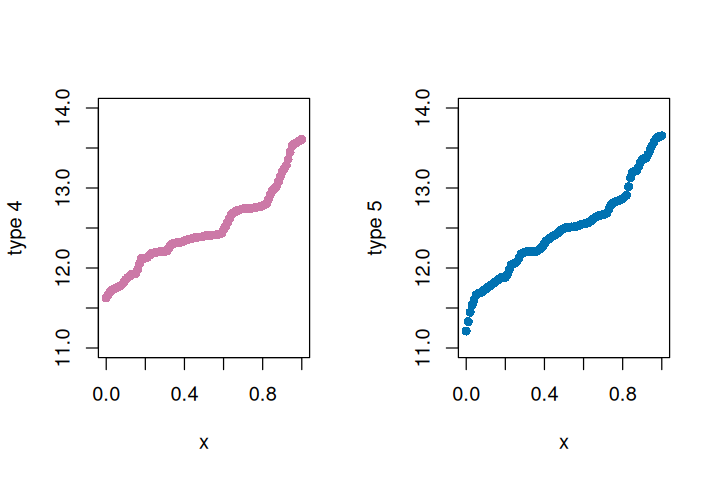

In [4]:
type4 <-
    data %>%
    filter(type == 4) %>%
    pull(luminosity) %>%
    log()

type5 <-
    data %>%
    filter(type == 5) %>%
    pull(luminosity) %>%
    log()

x <- seq(0, 1, 0.01)
t4q <- quantile(type4, x)
t5q <- quantile(type5, x)

ymin <- 11
ymax <- 14

set_plot_dimensions(6, 4)
par(mfrow = c(1, 2))
plot(x, t4q, col = cbPal[5], pch = 16, ylim = c(ymin, ymax), ylab = "type 4")
plot(x, t5q, col = cbPal[6], pch = 16, ylim = c(ymin, ymax), ylab = "type 5")


Plotting type 5 against type 4:

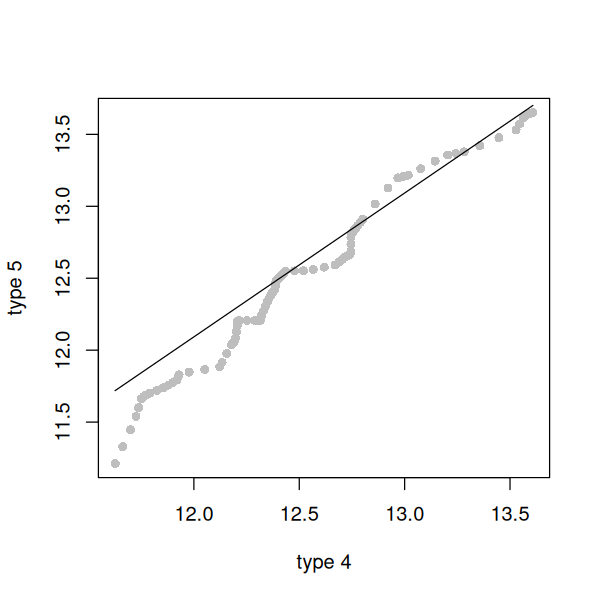

In [5]:
set_plot_dimensions(5, 5)
plot(t4q, t5q, col = "grey", pch = 16, xlab = "type 4", ylab = "type 5")

# the line with gradient 1, passing through Q50:
m <- 1
c <- t5q[50] - t4q[50] * m
lines(t4q, m * t4q + c, col = "black")


This looks like a pretty good fit, but we can do an [*F-test*](https://en.wikipedia.org/wiki/F-test_of_equality_of_variances) to be more rigorous:

### F-test for equality of variances

#### Theory

Once again, we need a two-tailed test:

$H_0$: The two populations have identical variance  $\sigma^2 = \sigma_1^2 = \sigma_2^2$.

$H_1$: The two populations have non-identical variances, $\sigma_1^2 \ne \sigma_2^2$.

The test statistic is simply the ratio of the sample variances:

$$F = \frac{s_1^2}{s_2^2}$$

Under $H_0$, $F$ follows an [*F-distribution*](https://en.wikipedia.org/wiki/F-distribution) with parameters $(n_1 - 1,n_2 - 1)$.

We use this distribution to calculate a p-value for the observed value of the test statistic, $F$.


#### Assumpions

- The two samples both follow normal distributions.

Note that the means of the two populations may differ.
The F-test is highly sensitive to deviations from the assumption of normality.


#### Application

We will set $\alpha=0.05$.

We can visualise the F-distribution corresponding to our example ($n_1 = n_2 = 40$):

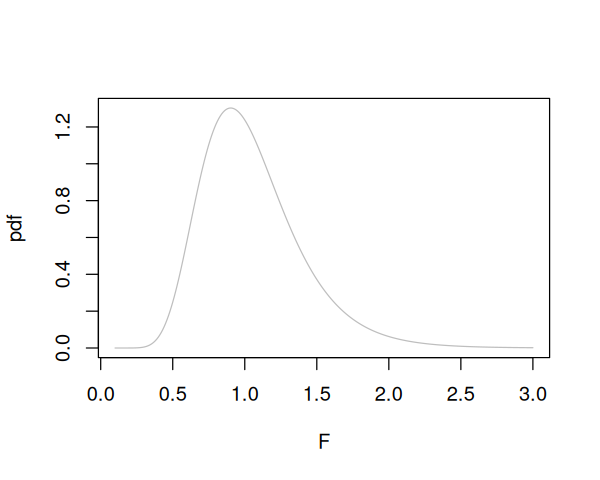

In [6]:
x <- seq(0.1, 3, 0.01)
set_plot_dimensions(5, 4)
plot(x, df(x, 39, 39), xlab = "F", ylab = "pdf", type = "l", col = "grey")


We will calculate the test statistic:

[1] "F = 0.713975307250036"


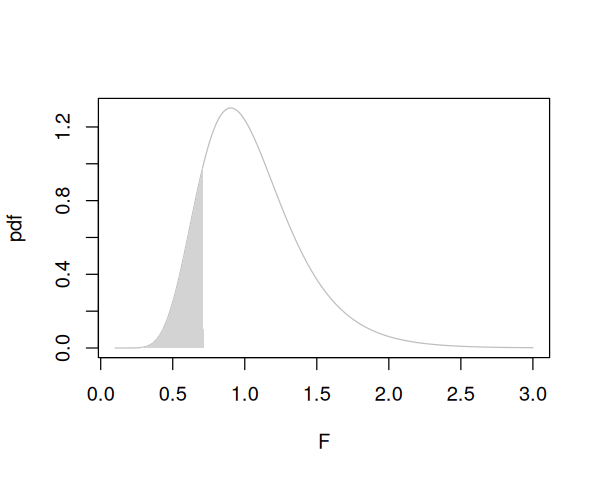

In [7]:
fstat <- var(type4) / var(type5)
print(paste("F =", fstat))

set_plot_dimensions(5, 4)
plot(x, df(x, 39, 39), xlab = "F", ylab = "pdf", type = "l", col = "grey")

x_region <- seq(0.1, fstat, 0.01)
polygon(c(x_region, fstat, 0.01), c(df(x_region, 39, 39), 0, 0), border = NA, col = "lightgrey")


We use the CDF to calculate the left-tail $p$-value and double it for a two-tailed test:

In [8]:
p_value <- pf(fstat, 39, 39) * 2
print(paste("p =", p_value))


[1] "p = 0.297027010291429"


Here, $p>\alpha$ so we accept the null hypothesis of equal variance, at the 5% level.

<br>

---